In [428]:
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import os
import numpy as np

In [429]:
DATA_PATH = "./"
ITERATIONS = ["_1","_2","_3","_4","_5"]

#Device Arrays as needed for plotting

#All Devices
DEVICES_ALL = ["6312kw", "adns5700", "apple1152","arduino", "bt58", "diamondback", "dragonrise_black",
               "dragonrise_green", "dualshock3_wired", "dualshock4_wired", "dualshock4_wireless",
               "exxter", "g15", "g300", "g5", "g700_wired", "g700_wireless", "g9", "gembird", "intelli_new",
               "intelli_og", "k120", "logilink0043", "nixdorf", "nvidiashield", "nvidiashield_wireless",
               "px1800", "rapoo", "rival", "roccat", "rx250", "sigma", "sk9620", "sunplus", "tramani_wired",
               "trust_oni_wireless", "unicomp", "wingman", "xbox360_wired", "xbox360_wireless", "xboxone_wireless"]

#Only Mice (ordered)
DEVICES_MICE = ["g5","g300","g700_wired", "g9", "intelli_new","diamondback","rival","bt58",
                "rx250","sunplus","intelli_og","logilink0043","apple1152", "adns5700"]

#Only Keyboards (ordered)
DEVICES_KEYBOARDS = ["px1800","roccat","sk9620","nixdorf","unicomp","sigma","k120","exxter","g15","gembird", "6312kw"]

#Only Gamepads excluding arduino (ordered)
DEVICES_GAMEPADS = ["wingman","dualshock4_wireless","nvidiashield","dualshock4_wired","xbox360_wired","xboxone_wireless","dualshock3_wired",
                    "nvidiashield_wireless","xbox360_wireless","tramani_wired","dragonrise_green","dragonrise_black"]

#Only Gamepads wired
DEVICES_GAMEPADS_WIRED = ["dragonrise_green","wingman","dragonrise_black","dualshock4_wired",
                          "tramani_wired","dualshock3_wired","xbox360_wired","nvidiashield"]

#Only Gamepads wired
DEVICES_GAMEPADS_WIRELESS= ["xboxone_wireless", "xbox360_wireless","nvidiashield_wireless"]

DEVICES_WITH_SPECIAL_DATA =["g9", "unicomp", "dualshock3_wired"]

DEVICES_WW =["g700_wired", "g700_wireless","nvidiashield", "nvidiashield_wireless","xbox360_wired", "xbox360_wireless"]


#Devices with odd Data
#DEVICES = ["diamondback", "exxter", "arduino"]


#TODO xbox360_wired polling rate
POLLING_RATES = {"6312kw" : 10, "adns5700" : 10, "apple1152" : 10, "arduino" : 1, 
                 "bt58" : 10, "diamondback" : 10, "dragonrise_black" : 10, "dragonrise_green" : 10, 
                 "dualshock3_wired" : 1, "dualshock4_wired" : 5, "dualshock4_wireless" : -1, "exxter" : 10, 
                 "g15" : 24, "g300" : 1, "g5" : 1, "g9": 10, "g700_wired" : 1, "g700_wireless" : -1, "gembird" : 10, 
                 "intelli_new" : 1, "intelli_og" : 10, "k120" : 10, "logilink0043" : 10, "nixdorf" : 10, 
                 "nvidiashield" : 1, "nvidiashield_wireless" : -1, "px1800" : 10, "rapoo" : -1, "rival" : 1, 
                 "roccat" : 1, "rx250" : 10, "sigma" : 10, "sk9620" : 10, "sunplus" : 10, 
                 "tramani_wired" : 10, "trust_oni_wireless" : 10, "unicomp" : 10, "wingman" : 10, 
                 "xbox360_wired" : 4, "xbox360_wireless" : 4, "xboxone_wireless" : -1}

DEVICE_NAMES ={"6312kw" : "Acer 6312-KW (PS/2)", "adns5700" : "Microsoft Optical Mouse 200", "apple1152" : "Apple A1152",
               "arduino" : "Arduino Micro","bt58" : "Logitech Premium Optical Wheel Mouse",
               "diamondback" : "Razor Diamondback","dragonrise_black" : "Speedlink Strike (Black)",
               "dragonrise_green" : "Speedlink Strike (Green)", "dualshock3_wired" : "Sony Dualshock 3",
               "dualshock4_wired" : "Sony Dualshock 4", "dualshock4_wireless" : "Sony Dualshock 4 wireless",
               "exxter" : "Exxter KE-200", "g15" : "Logitech G15", "g300" : "Logitech G300", "g5" : "Logitech G5",
               "g9" : "Logitech G9","g700_wired" : "Logitech G700", "g700_wireless" : "Logitech G700", "gembird" : "Gembird", 
               "intelli_new" : "Microsoft Intellimouse", "intelli_og" : "Microsoft Classic Intellimouse (PS/2)", 
               "k120" : "Logitech K120", "logilink0043" : "LogiLink ID0043", "nixdorf" : "Siemens Nixdorf (PS/2)", 
               "nvidiashield" : "nVidia Shield Gamepad", "nvidiashield_wireless" : "nVidia Shield Gamepad wireless", "px1800" : "PX-1800",
               "rapoo" : "Rapoo 6010B", "rival" : "Steel Series Rival Optical Mouse", "roccat" : "Roccat ISKU FX",
               "rx250" : "Logitech RX250", "sigma" : "Sigma", "sk9620" : "Acer SK-9620 (PS/2)", "sunplus" : "MS-TECH Laser Game Mouse",
               "tramani_wired" : "Tramani CT-P3000", "trust_oni_wireless" : "Trust Oni Wireless Micro Mouse",
               "unicomp" : "Unicomp Endura Pro", "wingman" : "Logitech Wingman", "xbox360_wired" : "XBox 360",
               "xbox360_wireless" : "XBox 360 wireless", "xboxone_wireless" : "XBox One Controller wireless"}

MODES = ["default_polling", "1ms_polling"]

all_raw_data = []

#print(os.system("ls"))
DEVICES = DEVICES_WITH_SPECIAL_DATA
for device in DEVICES:
    for mode in MODES:
        for iteration in ITERATIONS:
            if mode == "default_polling":
                path = DATA_PATH + mode + "/" + "AUTO_" + device + "_0ms" + iteration +".csv"
                try:
                    #print(path)
                    currentFile = pd.read_csv(path, comment="#", delimiter=';')
                except:
                    print("file missing: ", path)
                currentFile["device"] = device
                currentFile["latency"]/=1000
                #label = POLLING_RATES[device]
                #if(label == -1):
                #    label = "unknown"
                #label = "default {}ms".format(label)
                
                currentFile["polling"] = "default"
                currentFile["pollingRate"] = POLLING_RATES[device]
            else:
                path = DATA_PATH + mode + "/" + "AUTO_" + device + "_1ms" + iteration +".csv"
                try:
                    currentFile = pd.read_csv(path, comment="#", delimiter=';')
                except:
                    print("file missing: ", path)
                currentFile["device"] = device
                currentFile["latency"]/=1000
                #currentFile["polling"] = "forced 1ms"
                currentFile["polling"] = "forced"
                currentFile["pollingRate"] = 1
            #print(type(currentFile))
            #print(len(currentFile))
            #print(currentFile)
            
            # vllt später
            #if(currentFile["pollingRate"] == -1):
            #    currentFile["pollingRate"] = "unknown"
            
            all_raw_data.append(currentFile)
all_data = pd.concat(all_raw_data)
#all_data["latency (ms)"] = all_data["latency (s)"] * 1000.0

In [430]:
sns.set_style("whitegrid")

sns.set_context("paper", font_scale=3, rc={"lines.linewidth": 2.5})

g9
7.61
unicomp
11.51
dualshock3_wired
12.33


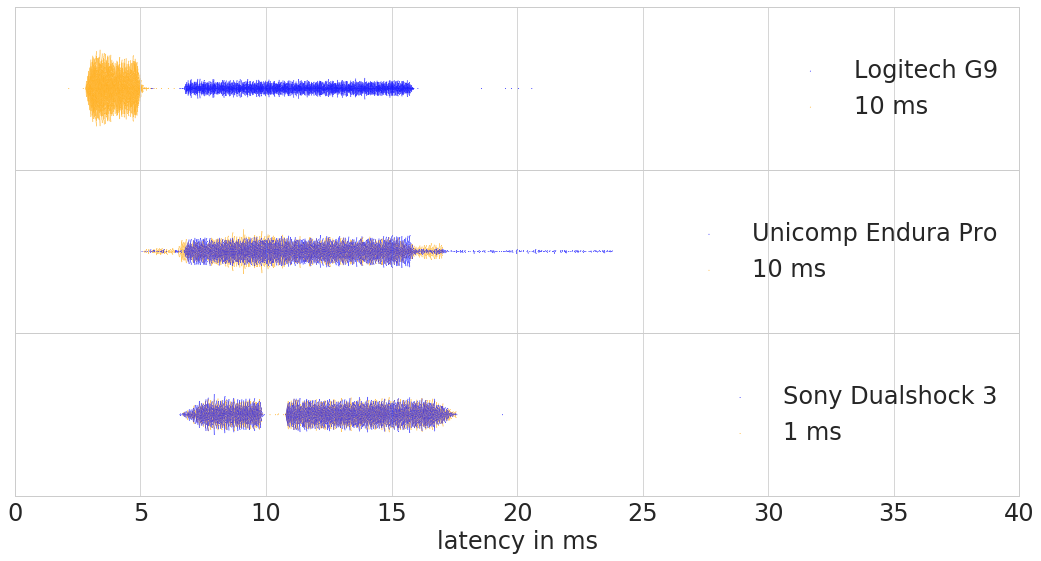

In [441]:
i = 0

import os
MAX_LATENCY = 100000 # microseconds

fig, axes = plt.subplots(len(DEVICES), 1, sharex =True)

#Here you can adjust the space between the subplots; value .001 results in no space between plots
plt.subplots_adjust(hspace = .001)
plt.rc('ytick', labelsize=24)
plt.xlabel('',fontsize=24)
fig.set_figheight(3 * len(DEVICES))
fig.set_figwidth(18)


poll_nice = {1: "1 ms", 4: "4 ms", 10: "10 ms", 24: "24 ms", -1: "n/a", 5: "5 ms"}

for device in DEVICES:
    
    
    #values_default = all_data[(all_data["device"] == DEVICES[i]) & ("default" in all_data["polling"])]
    values = all_data[((all_data["device"]) == DEVICES[i])]
    #values_forced = all_data[((all_data["device"]) == DEVICES[i]) & (all_data["polling"] != "default_polling")]
    #values_forced = all_data[((all_data["device"]) == DEVICES[i])]
       
    values_default = values[values["latency"]<=MAX_LATENCY]
    values_default = values_default[values_default["polling"] == "default"]
    
    values_forced = values[values["latency"]<=MAX_LATENCY]
    values_forced = values_forced[values_forced["polling"] == "forced"]
    #values_default = values_default[values_default["polling"]("default")]
    values_forced = values_forced[(values_forced["latency"]<=MAX_LATENCY) & ("default" not in values_forced["polling"])] 
    
    
    # plt.title(DEVICE_NAMES[device])
    #swarmi_default = sns.swarmplot((values_default["latency"]/1000), values_default["polling"], color="b", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=1, ax=axes[i])
    #swarmi_forced = sns.swarmplot((values_forced["latency"]/1000), values_forced["polling"], color="orange", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0, ax=axes[i])
    
    swarmi_default = sns.swarmplot((values_default["latency"]), color="b", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=1, ax=axes[i])
    swarmi_forced = sns.swarmplot((values_forced["latency"]), color="orange", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0, ax=axes[i])
    
    
    swarmi_forced.set_xlim(0, 40)
    swarmi_default.set_xlim(0, 40)
    
    
    #Useless in current Version (5.1.2019)??
    swarmi_forced.set(xlabel="", ylabel="")
    swarmi_default.set(xlabel="latency in ms", ylabel="")
    
    plt.tick_params(top='off', bottom='off', left='on', right='off', labelleft='off', labelbottom='on')
    
    
    #Additional Information in each plot; additional information can also be added in this legend
    #axes[i].text(26,-0.1, DEVICE_NAMES[device], fontsize=24)
    #axes[i].text(26, 0.2, poll_nice[POLLING_RATES[device]], fontsize=24)
    axes[i].legend(labels =(DEVICE_NAMES[device],poll_nice[POLLING_RATES[device]],"{:.2f}".format(np.mean(values["latency"]))), fontsize = 24, loc=7)
    #axes[i].legend.get_texts().set_ha("right")
    
    
    
    i = i+1
    
    
    
    #plt.savefig("png/{}alpha1.png".format(DEVICE_NAMES[device]), dpi=600)
    
    print(device)
    print("{:.2f}".format(np.mean(values["latency"])))
    #print("{:.2f}".format(np.sd(values["latency"])))
    # automatically print it - use carefully!
    #os.system("lp png/{}.png".format(device))
    
    #plt.close(fig)
    
    #swarmi_forced.set(xlabel='latency in ms', ylabel="")   
    
#plt.savefig("png/all_keyboards.png", dpi=300)
#plt.savefig("svg/all_keyboards.svg", dpi=300)


In [413]:
def plot_multi(data1,data2, plot_file_names=False):
    fig, axes = plt.subplots(ncols=7, sharey=True)
    fig.set_figheight(16)
    fig.set_figwidth(16)
    plt.subplots_adjust(wspace = 0.05)
    axes[0].set_ylim(0,25)
    #for renaming axes 
    #axes[0].set_yticklabels([])
    
    
    #axes[0].set_axis_on()
    
    data_combined=[data1["latency"],data2["latency"]]
    
    # barplots
    sns.barplot(data=(data_combined), ci=95, n_boot=1000, units=None, orient=None, color='grey',ax=axes[0])
    axes[0].set_title("barplot")
    axes[0].set_ylabel("latency in ms")
    
    # boxplots    
    sns.boxplot(data=data_combined, color='grey', saturation=0.75, width=0.8, fliersize=5, linewidth=None, whis=1.5, ax=axes[1])    
    axes[1].set_title("boxplot")
    
    #violinplots
    sns.violinplot(data=data_combined, scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, linewidth=None, color='grey', saturation=0.75, ax=axes[2])
    axes[2].set_title("violinplot")
   
    # distplots
    sns.distplot(data1["latency"],rug=False,color='grey', ax=axes[3], vertical=True, axlabel=False)
    sns.distplot(data2["latency"],color='black', ax=axes[4], vertical=True, axlabel=False)
    axes[3].set_title("histplot 1")
    axes[4].set_title("histplot 2")
    axes[3].invert_xaxis()
  
    #swarmplot
    sns.swarmplot(data1["latency"], hue=None, color='black', size=1, dodge=True, marker="H",orient="v", alpha=1, ax =axes[5])
    axes[5].set_title("swarmplot 1")
    
    sns.swarmplot(data2["latency"], hue=None, color='000000', size=1, dodge=True, marker="H",orient="v", alpha=1, ax =axes[6])
    axes[6].set_title("swarmplot 2")
    
    axes[0].set_xticklabels([])
    axes[1].set_xticklabels([])
    axes[2].set_xticklabels([])
    axes[3].set_xticklabels([])
    axes[4].set_xticklabels([])
    
    axes[5].set_ylabel('')
    axes[6].set_ylabel('')
    
    
    
    #savefiles
    plt.savefig("png/different_visualisations.png", dpi=300)
    plt.savefig("svg/different_visualisations.svg", dpi=300)
  
    plt.show()

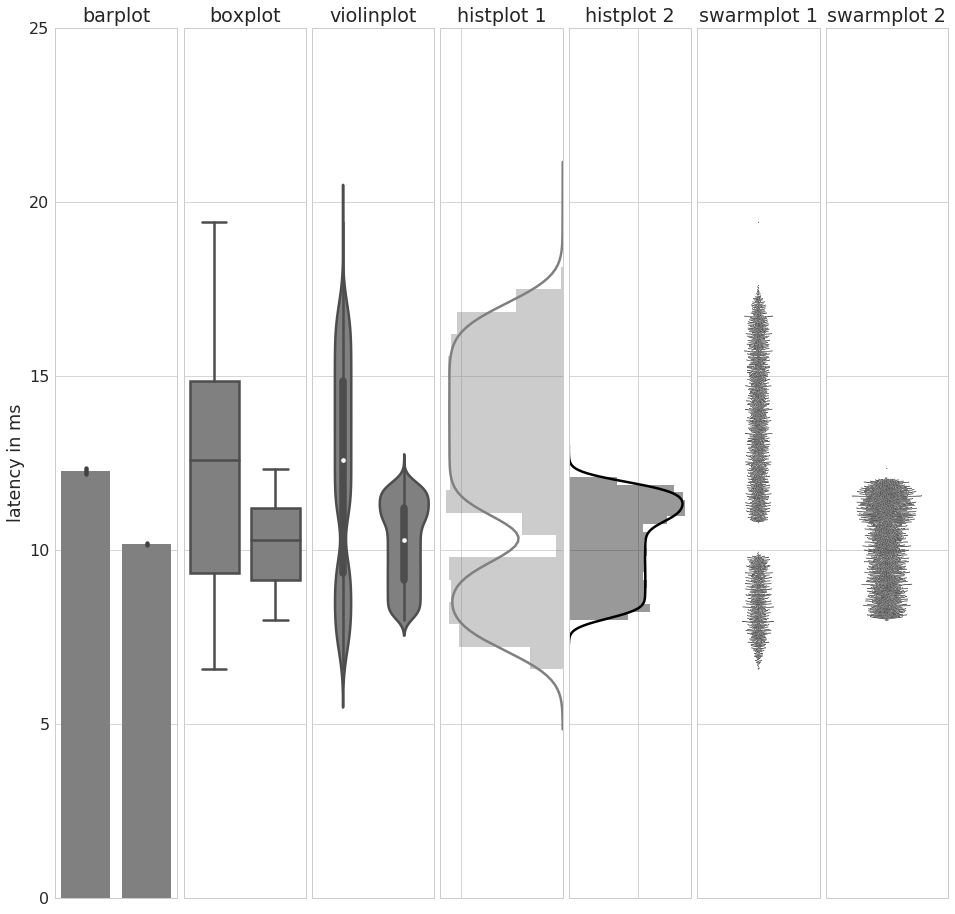

In [388]:
multiplotdevice1 = all_data[((all_data["device"]) == "dualshock3_wired") & ((all_data["polling"]) == "default")]
multiplotdevice2 = all_data[((all_data["device"]) == "dualshock4_wired") & ((all_data["polling"]) == "default")]

sns.set_context("paper", font_scale=2, rc={"lines.linewidth": 2.5})


plot_multi(multiplotdevice1, multiplotdevice2)

In [ ]:
#ab hier nur kurze Experimente

In [426]:
all_data

,counter,latency,delayTime,device,polling,pollingRate
0,0,4.086,3745,px1800,default,10
1,1,6.860,1018,px1800,default,10
2,2,6.098,1774,px1800,default,10
3,3,12.692,3088,px1800,default,10
4,4,11.686,4150,px1800,default,10
5,5,9.229,6643,px1800,default,10
6,6,7.173,676,px1800,default,10
7,7,10.074,5725,px1800,default,10
8,8,7.693,244,px1800,default,10
9,9,7.770,109,px1800,default,10


In [427]:
i = 0

import os
MAX_LATENCY = 100000 # microseconds

poll_nice = {1: "1 ms", 4: "4 ms", 10: "10 ms", 24: "24 ms", -1: "n/a", 5: "5 ms"}

for device in DEVICES:
    
    values = all_data[((all_data["device"]) == DEVICES[i])]
       
    values_default = values[values["latency"]<=MAX_LATENCY]
    values_default = values_default[values_default["polling"] == "default"]
    
    values_forced = values[values["latency"]<=MAX_LATENCY]
    values_forced = values_forced[values_forced["polling"] == "forced"]

    values_forced = values_forced[(values_forced["latency"]<=MAX_LATENCY) & ("default" not in values_forced["polling"])] 
    
    #print(values_default)
    
    
    i = i+1
 
    print(device)
    

     counter  latency  delayTime  device  polling  pollingRate
0          0    4.086       3745  px1800  default           10
1          1    6.860       1018  px1800  default           10
2          2    6.098       1774  px1800  default           10
3          3   12.692       3088  px1800  default           10
4          4   11.686       4150  px1800  default           10
5          5    9.229       6643  px1800  default           10
6          6    7.173        676  px1800  default           10
7          7   10.074       5725  px1800  default           10
8          8    7.693        244  px1800  default           10
9          9    7.770        109  px1800  default           10
10        10    9.160       6616  px1800  default           10
11        11    7.086        766  px1800  default           10
12        12    6.814       8992  px1800  default           10
13        13    8.959       6913  px1800  default           10
14        14   10.312       5536  px1800  default      

ValueError: min() arg is an empty sequence

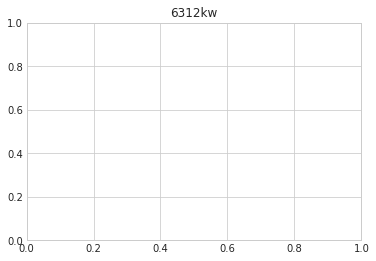

In [10]:
values = all_data[(all_data["device"]) == "diamondback"]

plt.title(device)

ax = sns.pointplot((values["latency"]), values["polling"], join=False, palette="dark", markers="D", scale=.75, ci="sd", zorder=1, errwidth=0.5, capsize=.2, ax =axes)
ax = sns.swarmplot((values["latency"]), values["polling"], hue=None, palette="colorblind", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0)

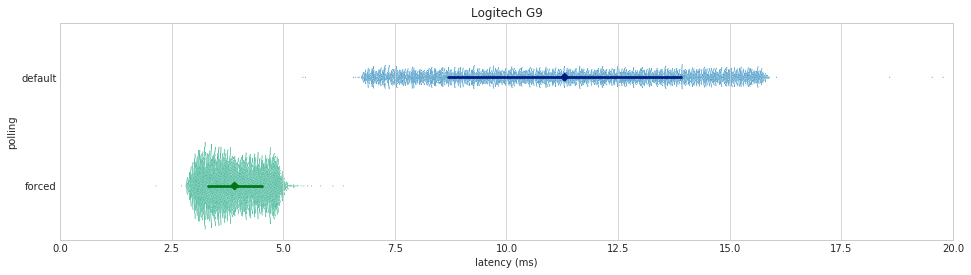

In [40]:
values = all_data[(all_data["device"] == "g9")]


plt.figure(figsize=[16, 4])
#plt.title('Swarmplot of '+ values["device"])

ax = sns.pointplot((values["latency"]/1000), values["polling"], join=False, palette="dark", markers="D", scale=.75, ci="sd", zorder=1)
ax = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="colorblind", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0)

plt.title(DEVICE_NAMES["g9"])
plt.xlabel("latency (ms)")
plt.xlim(0, 20)

axes = plt.gca()
#axes.set_xlim(0,100)

In [ ]:
#Plotting all devices in one picture
i = 0

#plt.xlim(0, 80)
fig, axes = plt.subplots((len(DEVICES)), 1)


fig.set_figheight(4 * len(DEVICES))
fig.set_figwidth(16)

#fig(xlim = [0,80])


#axes.set_xlabel("latency (ms)")
#axes = plt.gca()
#axes.set_xlim([0,80])



for device in DEVICES:
    values = all_data[(all_data["device"]) == DEVICES[i]]

    plt.title('Swarmplot of '+ device)
    #sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="Set2",size=1,orient="h",alpha=1, ax=axes[i])    
    
    #point_plot = sns.pointplot((values["latency"]/1000), values["polling"], join=False, palette="dark", markers="D", scale=.75, ci="sd", zorder=1, ax=axes[i], capsize=.2)
    swarm_plot = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="colorblind", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0, edgecolors='w', ax=axes[i])

    POLLING_RATES[device]
    
    axes[i].set_xlim(0, 40)
    i = i+1
    print(device)


plt.savefig("svg/allDevices.svg")
plt.savefig("png/allDevices.png")

In [13]:
#Plotting a single swarmplot
values = all_data[(all_data["device"] == "g9")]

plt.figure(figsize=[16, 8])
#plt.title('Swarmplot of '+ values["device"])

#plt.figure()

ax = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="Set1", size=1,marker ="H", orient="h", alpha=1)
#ax = sns.violinplot((values["latency"]/1000), values["polling"], inner=None, palette="Set2", split=True )
plt.xlabel("latency (ms)")
plt.xlim(0, 100)

#axes = plt.gca()
#axes.set_xlim(0,100)

ValueError: min() arg is an empty sequence

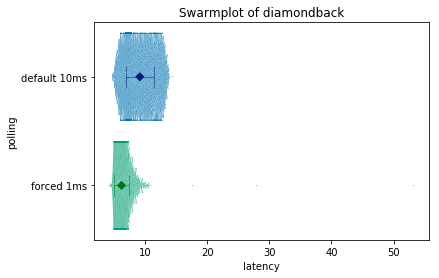

In [17]:
MAX_LATENCY = 100000 # microseconds
values = all_data[(all_data["device"]) == "diamondback"]
values = values[values["latency"]<=MAX_LATENCY]
plt.title('Swarmplot of '+ device)

ax = sns.pointplot((values["latency"]/1000), values["polling"], join=False, palette="dark", markers="D", scale=.75, ci="sd", zorder=1, errwidth=0.5, capsize=.2)
ax = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="colorblind", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0)

#plt.savefig("svg/test1.svg")
#plt.savefig("png/test1.png")